# Access a Database with Python using sqlite3 Package - European Soccer Dataset

## Introduction
---
We will be working with the soccer database from kaggle.: https://www.kaggle.com/hugomathien/soccer.
It is the ultimate Soccer database for data analysis and machine learning and the entire details can be accessed from kaggle.      

The database contains 8 tables further containing columns.
 
Download the dataset in SQLite format from Kaggle and save it in the same directory as your jupyter notebook.

---

## Importing basic libraries

In [10]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Accessing the Database with the sqlite3 Package

In [2]:
# Creating the connection to database
con = sqlite3.connect('soccer.sqlite')
cursor = con.cursor()


## Accessing all the TABLES

In [8]:
for row in cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('sqlite_sequence',)
('Player_Attributes',)
('Player',)
('Match',)
('League',)
('Country',)
('Team',)
('Team_Attributes',)


## Reading all the TABLES

In [11]:


country_table = pd.read_sql_query("SELECT * FROM Country", con)
league_table = pd.read_sql_query("SELECT * FROM League", con)
match_table = pd.read_sql_query("SELECT * FROM Match", con)
player_table = pd.read_sql_query("SELECT * FROM Player", con)
player_att_table = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
team_table = pd.read_sql_query("SELECT * FROM Team", con)
team_att_table = pd.read_sql_query("SELECT * FROM Team_Attributes", con)


# Exploratory Data Analysis

### Country Table

In [35]:
print("Dimension of Country Table is: {}".format(country_table.shape))
print(100*" ")
print(country_table.info())
print(100*" ")
print(country_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*" ")
print(country_table.describe())
print(100*" ")
print(country_table.isnull().sum(axis=0))

Dimension of Country Table is: (11, 2)
                                                                                                    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
                                                                                                    
          name
count       11
unique      11
top     Poland
freq         1
                                                                                                    
                 id
count     11.000000
mean   12452.090909
std     8215.308472
min        1.000000
25%     6289.000000
50%    13274.000000
75%    18668.000000
max    24558.000000
                                                                                                    
id      0
name    0
dtype: int64


In [27]:
country_table

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


###  Player Table

In [34]:
print("Dimension of Player Table is: {}".format(player_table.shape))
print(100*" ")
print(player_table.info())
print(100*" ")
print(player_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*" ")
print(player_table.describe())
print(100*" ")
print(player_table.isnull().sum(axis=0))


Dimension of Player Table is: (11060, 7)
                                                                                                    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB
None
                                                                                                    
       player_name             birthday
count        11060                11060
unique       10848                 5762
top         Danilo  1989-03-02 00:00:00
freq             7                   10
                                                                           

In [27]:
player_att_table.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [30]:
height_more_than_150 = pd.read_sql_query("SELECT * FROM Player WHERE height >= 150 ", con)
print(height_more_than_150)

          id  player_api_id             player_name  player_fifa_api_id  \
0          1         505942      Aaron Appindangoye              218353   
1          2         155782         Aaron Cresswell              189615   
2          3         162549             Aaron Doran              186170   
3          4          30572           Aaron Galindo              140161   
4          5          23780            Aaron Hughes               17725   
5          6          27316              Aaron Hunt              158138   
6          7         564793              Aaron Kuhl              221280   
7          8          30895            Aaron Lennon              152747   
8          9         528212            Aaron Lennox              206592   
9         10         101042           Aaron Meijers              188621   
10        11          23889           Aaron Mokoena               47189   
11        12         231592              Aaron Mooy              194958   
12        13         1632

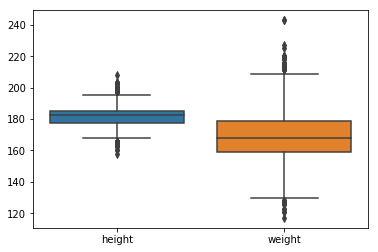

In [32]:
# Relationship between Player's heights and weights in a  boxplot
sns.boxplot(data = player_table.loc[:,["height",'weight']])

C:\Users\Parul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Parul\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


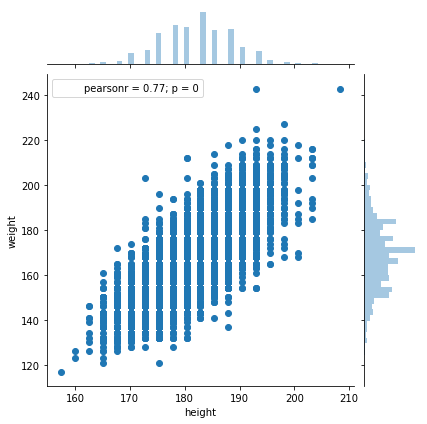

In [33]:
# Relationship between Player's height and weight in a jointplot
sns.jointplot(x='height',y = 'weight',data = player_table,kind = 'scatter')

Please feel feel to explore other tables too